# Machine Learning Project
## Author: Lampadaridis Kokkinakis Foivos
### Importing our data

In [1]:
import pandas as pd
df = pd.read_csv("Higgs_8k.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,0.000000,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,...,1.210464,-0.117351,0.000000,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,0.000000,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


## Data preperation

In [2]:
df[17]

0       0.000000000000000000e+00.1
1                              0.0
2                2.548224449157715
3                              0.0
4                              0.0
                   ...            
7996             2.548224449157715
7997             2.548224449157715
7998             2.548224449157715
7999                           0.0
8000             2.548224449157715
Name: 17, Length: 8001, dtype: object

__We see that the low level quantity at column 17 isn't in a float64 format.__

In [3]:
# We change the first element manually because it can't be done automatically
df.at[0,17]=0.0
df[17]=df[17].astype(float)

#### We separate our data in three categories

1) signal: Holds the decision on whether an event was a legitimate signal or just noise
2) low_level: Holds the values of each one out of the 21 low-level quantities for each event
3) high_level: Holds the values of each one out of the 7 high-level quantities for each event

In [4]:
signal=df.iloc[:,0]
low_level=df.iloc[:,1:22]
high_level=df.iloc[:,22:29]

In [5]:
signal

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7996    1.0
7997    0.0
7998    1.0
7999    0.0
8000    0.0
Name: 0, Length: 8001, dtype: float64

In [6]:
low_level

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961
1,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,1.002695,...,-1.466066,0.000000,0.782744,-0.882768,1.008969,0.000000,1.536386,0.387635,1.596321,1.550981
2,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,0.894418,...,-0.809703,0.000000,1.205289,0.352439,0.626202,2.548224,1.626933,-0.426866,1.153501,0.000000
3,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,0.655957,...,-0.454609,2.214872,1.027034,-1.158574,0.533561,0.000000,1.809489,0.567525,-1.475778,0.000000
4,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,-0.168871,0.000000,0.618187,2.103758,1.222542,0.000000,1.093142,0.904818,1.165154,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,0.728604,...,-1.485485,0.000000,0.876702,-0.268350,0.324426,2.548224,0.904744,0.632485,-0.704450,1.550981
7997,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,1.167629,...,1.304859,0.000000,1.066373,1.257226,-0.844507,2.548224,1.017442,-0.765825,1.250610,0.000000
7998,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,0.530809,...,-0.866295,0.000000,1.190186,0.092108,0.726054,2.548224,0.717564,1.210464,-0.117351,0.000000
7999,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,1.438573,...,0.664586,0.000000,0.927632,0.642808,0.135261,0.000000,1.067827,-0.107062,-1.701072,0.000000


In [7]:
high_level

,22,23,24,25,26,27,28
0,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...
7996,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


### We split the initial data in training and test data.
#### We use 80% of our data and we choose a random state so our results are repeatable. First we split the data based on the low level quantities

In [8]:
from sklearn.model_selection import train_test_split
low_level_train, low_level_test, low_signal_train, low_signal_test = train_test_split(low_level, signal, test_size = 0.2, random_state = 55)

#### The low level quantities training data

In [9]:
low_level_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
558,0.919987,0.168442,-1.669267,0.867853,-0.768654,2.427500,1.422935,0.796244,2.173076,0.906379,...,-0.848541,0.000000,0.837011,-0.691616,-1.421432,2.548224,2.629771,-0.504319,-0.633976,0.000000
2261,0.771749,-0.923377,-1.594360,1.641011,1.462013,0.748889,-0.173316,1.099487,2.173076,1.265204,...,-0.788619,0.000000,0.951868,-0.079019,1.732899,2.548224,1.201214,1.143838,-0.441419,0.000000
3903,1.539839,-0.155889,0.804965,1.266646,0.253007,2.169809,-2.131991,1.465375,0.000000,1.694535,...,-0.759213,2.214872,0.555490,-1.039331,-0.566585,0.000000,1.770300,-0.642567,-0.058530,3.101961
6424,0.374803,-0.482169,-1.737514,0.999940,-0.769625,0.721132,1.167456,-0.594789,0.000000,1.004836,...,0.710082,1.107436,1.435529,1.333687,1.140996,2.548224,1.251843,0.644977,-1.222738,0.000000
527,1.169794,-0.125696,-0.526249,0.697233,0.774323,0.957753,-0.151531,0.869421,0.000000,1.178331,...,-1.069918,0.000000,1.292924,-0.129993,-1.579531,1.274112,1.021580,0.544206,-0.054091,3.101961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,1.284907,0.853142,1.590094,1.739028,-1.564044,0.875857,0.298034,0.260717,2.173076,0.734395,...,-0.470699,0.000000,0.560408,1.004177,0.184078,0.000000,1.006245,-0.560951,1.103004,3.101961
968,0.512059,0.467451,-0.418606,0.949673,0.787293,0.382369,-0.542671,-1.042724,2.173076,0.915948,...,0.341120,2.214872,1.126084,1.789722,-1.232267,0.000000,0.872128,-0.894080,1.413754,0.000000
4391,0.603015,-0.195822,0.741711,0.475686,-1.156392,0.867245,0.689175,1.517486,0.000000,0.989098,...,-0.307579,1.107436,1.040205,0.805743,0.335520,2.548224,0.470263,1.795106,1.420968,0.000000
4762,0.763697,-0.756828,-0.178351,1.726985,0.318546,1.289372,-0.023791,1.353945,2.173076,1.300080,...,-0.169426,1.107436,2.222839,-0.482259,-1.022577,0.000000,3.417193,0.589178,1.189015,0.000000


#### The low level quantities testing data

In [10]:
low_level_test

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
6191,1.696494,-0.133488,-1.577160,0.669567,-0.735742,1.019039,0.561435,0.692021,2.173076,0.888375,...,-0.040706,0.000000,0.309972,1.401956,-0.576570,2.548224,0.581743,0.423446,-1.214969,0.000000
5216,0.637421,-0.582487,0.589124,1.120703,-0.453525,0.574927,1.349658,-1.100934,2.173076,0.213029,...,0.575813,0.000000,0.869326,-1.345175,1.352350,0.000000,0.935657,0.085320,0.917108,3.101961
1038,1.148382,-1.012982,-0.549554,2.459766,-0.789561,0.945112,-1.481409,1.281877,0.000000,0.894041,...,0.652934,0.000000,0.281872,1.140715,0.702755,0.000000,0.502392,-0.600926,0.825548,3.101961
5268,1.537825,0.318434,-0.937404,0.832626,1.716062,0.837565,0.291102,0.260717,0.000000,0.828067,...,1.398071,2.214872,0.465572,0.629155,1.215331,2.548224,0.761378,-1.064809,-0.241651,0.000000
4530,0.702938,-1.471721,-0.327609,1.003314,1.174149,1.015924,-0.927871,-0.781614,2.173076,1.244052,...,0.840467,1.107436,0.709159,-0.961050,-1.520729,0.000000,0.631642,-0.806634,-0.034669,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6882,0.857764,0.977811,-1.258114,0.285557,0.160557,0.728919,1.229840,1.087291,2.173076,0.560522,...,-0.108950,0.000000,0.407442,2.345884,0.937963,0.000000,1.077564,0.729092,-0.657838,3.101961
6499,1.517145,0.844377,0.684006,1.765983,0.965073,1.032871,0.753540,-1.303835,1.086538,1.079119,...,-0.530620,2.214872,0.485417,1.715992,-0.063437,0.000000,0.421581,1.272093,0.409919,0.000000
1521,1.310345,-1.578858,-1.267547,0.343636,-0.133639,0.612394,-1.027884,-1.695779,2.173076,0.831844,...,0.333352,0.000000,1.019131,0.243209,0.500277,0.000000,0.466612,-0.159530,-1.111201,3.101961
1974,1.597852,-1.001294,-0.945727,1.007137,0.525621,1.200604,-0.800131,-1.575479,2.173076,0.875029,...,0.447092,0.000000,0.418857,-0.877307,0.345506,2.548224,1.055413,0.517555,-0.066299,0.000000


#### The signal training data

In [11]:
low_signal_train

558     0.0
2261    1.0
3903    1.0
6424    1.0
527     1.0
       ... 
6685    1.0
968     0.0
4391    0.0
4762    0.0
4557    0.0
Name: 0, Length: 6400, dtype: float64

#### The signal testing data

In [12]:
low_signal_test

6191    1.0
5216    0.0
1038    0.0
5268    0.0
4530    0.0
       ... 
6882    0.0
6499    1.0
1521    0.0
1974    1.0
3971    1.0
Name: 0, Length: 1601, dtype: float64

### Secondly we split the data based on the high level quantities

In [13]:
from sklearn.model_selection import train_test_split
high_level_train, high_level_test, high_signal_train, high_signal_test = train_test_split(high_level, signal, test_size = 0.2, random_state = 55)

#### The high level quantities training data

In [14]:
high_level_train

,22,23,24,25,26,27,28
558,0.939936,0.799407,0.981405,1.790277,2.865841,2.661407,1.966332
2261,0.557915,1.021914,1.001741,0.693312,0.569491,0.864262,0.878331
3903,2.172351,2.105363,0.986304,1.517764,0.924190,1.738297,1.761921
6424,0.969525,1.099627,0.992685,0.922223,0.906469,0.904657,0.834394
527,1.540793,1.033941,1.153267,0.886378,0.933340,0.866549,0.801766
...,...,...,...,...,...,...,...
6685,0.930493,0.746777,0.982731,1.362069,0.848919,0.956550,0.833516
968,0.564922,1.275097,0.986962,0.605224,0.827673,1.185975,1.025087
4391,0.781099,0.920221,0.987349,0.739156,0.597598,0.800640,0.691822
4762,0.781869,1.244132,0.994679,1.742521,1.892563,1.454525,1.371591


#### The high level quantities testing data

In [15]:
high_level_test

,22,23,24,25,26,27,28
6191,0.833500,0.947524,1.016251,0.709710,0.729216,0.861885,0.758795
5216,0.443899,0.612628,0.989577,1.051361,0.915934,0.984679,0.862196
1038,0.255392,0.782227,0.979842,0.916311,0.319450,0.687721,1.568764
5268,1.187971,0.867769,1.068933,0.817424,0.225110,0.701659,0.766292
4530,0.719307,0.821773,1.136128,1.021597,1.667356,0.968671,0.768932
...,...,...,...,...,...,...,...
6882,0.596794,0.920889,0.982332,0.578559,0.953684,0.732985,0.768683
6499,1.077261,1.017980,0.973325,1.358371,1.001738,1.213072,0.991994
1521,1.786620,1.086982,0.982931,0.748695,0.376792,0.844203,0.857091
1974,0.988397,1.402846,1.705302,0.833418,0.874715,0.844497,0.842401


#### The signal training data

In [16]:
high_signal_train

558     0.0
2261    1.0
3903    1.0
6424    1.0
527     1.0
       ... 
6685    1.0
968     0.0
4391    0.0
4762    0.0
4557    0.0
Name: 0, Length: 6400, dtype: float64

#### The signal testing data

In [17]:
high_signal_test

6191    1.0
5216    0.0
1038    0.0
5268    0.0
4530    0.0
       ... 
6882    0.0
6499    1.0
1521    0.0
1974    1.0
3971    1.0
Name: 0, Length: 1601, dtype: float64

   ## A1)  Using a knn classificator
   ### i) Using low level quantities

#### We need to scale our data before using the knn algorythm

In [18]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler=StandardScaler()

low_level_train_scaled=scaler.fit_transform(low_level_train)
low_level_test_scaled=scaler.transform(low_level_test)

#### We create the knn classifier using the scaled low level quantities. We chose the number of neibours taken into acount as 10.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_low_classifier= KNeighborsClassifier(n_neighbors=10)
knn_low_classifier.fit(low_level_train_scaled, low_signal_train)

KNeighborsClassifier(n_neighbors=10)

#### The prediction of our knn classifier when using the low level quantities is:

In [20]:
knn_low_signal_test_pred=knn_low_classifier.predict(low_level_test_scaled)
knn_low_signal_test_pred

array([1., 1., 0., ..., 0., 0., 0.])

#### To test the validity of our results we calculate the confusion matrix and the accuracy.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
knn_low_cm = confusion_matrix(low_signal_test, knn_low_signal_test_pred)
print(f"The confusion matrix when using the knn classifier with the low level quantities is : \n{knn_low_cm}")
print(f"The accuracy when using the knn classifier with the low level quantities is : \n {accuracy_score(low_signal_test, knn_low_signal_test_pred)}")

The confusion matrix when using the knn classifier with the low level quantities is : 
[[426 285]
 [400 490]]
The accuracy when using the knn classifier with the low level quantities is : 
 0.5721424109931293


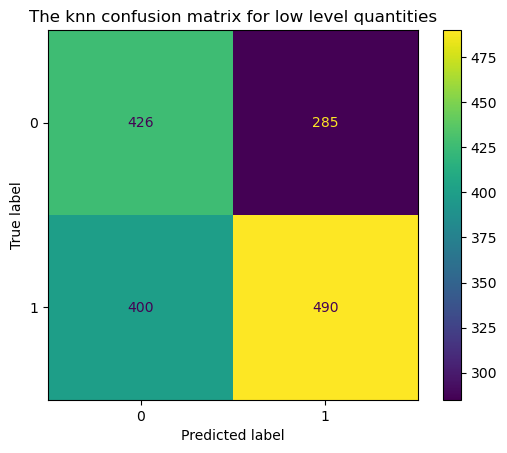

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
knn_low_disp = ConfusionMatrixDisplay(confusion_matrix=knn_low_cm)
knn_low_disp.plot()
plt.title("The knn confusion matrix for low level quantities")
plt.show()

### ii) Using high level quantities

#### We need to scale our high level data before using the knn algorythm

In [23]:
scaler=StandardScaler()

high_level_train_scaled=scaler.fit_transform(high_level_train)
high_level_test_scaled=scaler.transform(high_level_test)

#### We create the knn classifier using the scaled high level quantities. We chose the number of neibours taken into acount as 10.

In [24]:
knn_high_classifier= KNeighborsClassifier(n_neighbors=10)
knn_high_classifier.fit(high_level_train_scaled, high_signal_train)

KNeighborsClassifier(n_neighbors=10)

#### The prediction of our knn classifier when using the high level quantities is:

In [25]:
knn_high_signal_test_pred=knn_high_classifier.predict(high_level_test_scaled)
knn_high_signal_test_pred

array([1., 1., 0., ..., 1., 1., 0.])

#### To test the validity of our results we calculate the confusion matrix and the accuracy.

In [26]:
knn_high_cm = confusion_matrix(high_signal_test, knn_high_signal_test_pred)
print(f"The confusion matrix when using the knn classifier with the high level quantities is : \n{knn_high_cm}")
print(f"The accuracy when using the knn classifier with the high level quantities is : \n {accuracy_score(high_signal_test, knn_high_signal_test_pred)}")

The confusion matrix when using the knn classifier with the high level quantities is : 
[[482 229]
 [314 576]]
The accuracy when using the knn classifier with the high level quantities is : 
 0.6608369768894441


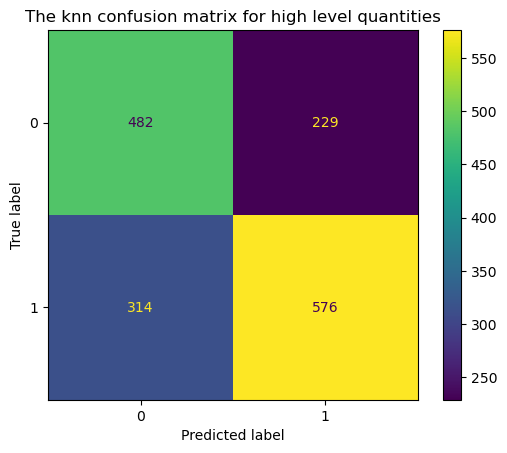

In [27]:
knn_high_disp = ConfusionMatrixDisplay(confusion_matrix=knn_high_cm)
knn_high_disp.plot()
plt.title("The knn confusion matrix for high level quantities")
plt.show()

   ## A2)  Using a Random Forest classificator
   ### i) Using low level quantities

#### We desided to use the same training and test samples so we can make a direct compairision between the two classifiers. We dont need any scaling when using the Random Forest classifier. The classifier for the low level quantities is:

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_low_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_low_classifier.fit(low_level_train, low_signal_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

#### The prediction of our random forrest classifier when using the low level quantities is:

In [29]:
rf_low_signal_test_pred=rf_low_classifier.predict(low_level_test)
rf_low_signal_test_pred

array([1., 1., 0., ..., 0., 1., 1.])

#### To test the validity of our results we calculate the confusion matrix and the accuracy.

In [30]:
rf_low_cm = confusion_matrix(low_signal_test, rf_low_signal_test_pred)
print(f"The confusion matrix when using the random forest classifier with the low level quantities is : \n{rf_low_cm}")
print(f"The accuracy when using the random classifier with the low level quantities is : \n {accuracy_score(low_signal_test, rf_low_signal_test_pred)}")

The confusion matrix when using the random forest classifier with the low level quantities is : 
[[404 307]
 [329 561]]
The accuracy when using the random classifier with the low level quantities is : 
 0.6027482823235478


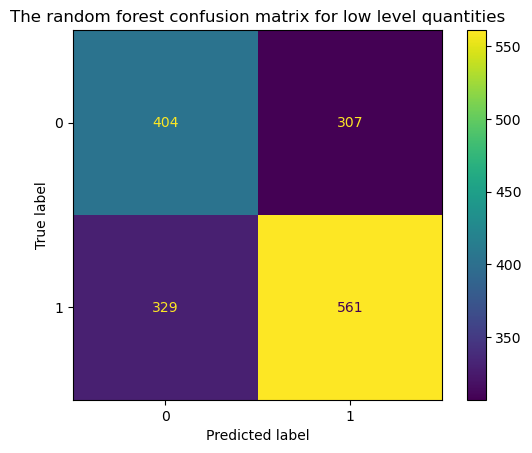

In [31]:
rf_low_disp = ConfusionMatrixDisplay(confusion_matrix=rf_low_cm)
rf_low_disp.plot()
plt.title("The random forest confusion matrix for low level quantities")
plt.show()

   ## A2)  Using a Random Forest classificator
   ### i) Using high level quantities

#### The classifier for the high level quantities is:

In [32]:
rf_high_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_high_classifier.fit(high_level_train, high_signal_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

#### The prediction of our random forrest classifier when using the high level quantities is:

In [33]:
rf_high_signal_test_pred=rf_high_classifier.predict(high_level_test)
rf_high_signal_test_pred

array([1., 1., 0., ..., 1., 1., 1.])

#### To test the validity of our results we calculate the confusion matrix and the accuracy.

In [34]:
rf_high_cm = confusion_matrix(high_signal_test, rf_high_signal_test_pred)
print(f"The confusion matrix when using the random forest classifier with the low level quantities is : \n{rf_high_cm}")
print(f"The accuracy when using the random classifier with the low level quantities is : \n {accuracy_score(high_signal_test, rf_high_signal_test_pred)}")

The confusion matrix when using the random forest classifier with the low level quantities is : 
[[491 220]
 [288 602]]
The accuracy when using the random classifier with the low level quantities is : 
 0.6826983135540288


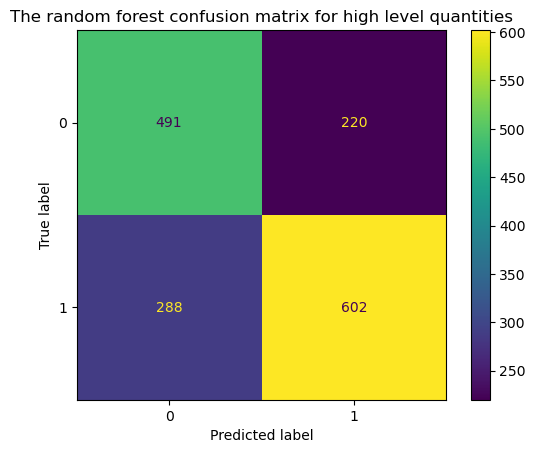

In [35]:
rf_high_disp = ConfusionMatrixDisplay(confusion_matrix=rf_high_cm)
rf_high_disp.plot()
plt.title("The random forest confusion matrix for high level quantities")
plt.show()

## B) Artificial Neural Network (ANN) Classification
### i) Using low level quantities
#### The data is already scaled so we move on to bulding the ANN for the low level quantities using tensorflow:

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
ann_low=tf.keras.models.Sequential()

#### We add the input layer and the first hidden layer. It has 21 nodes since there is 21 low level quantities

In [37]:
ann_low.add(Input(shape=(21,)))

#### The 1st hidden layer has 30 nodes

In [38]:
ann_low.add(tf.keras.layers.Dense(30, activation='relu'))

#### The 2nd hidden layer has 21 nodes

In [39]:
ann_low.add(tf.keras.layers.Dense(21, activation='relu'))

#### The output layer has just one node (we use sigmoid as activation because this is a binary classification problem)

In [40]:
ann_low.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### We move into training our ANN. First we must compile our ANN. Since this is a a binary classification problem we chose the 'binary_crossentropy' loss function, the 'binary_accuracy' metric and the 'adam' optimizer.

In [41]:
ann_low.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [42]:
ann_low.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │             651 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,333 (5.21 KB)

 Trainable params: 1,333 (5.21 KB)

 Non-trainable params: 0 (0.00 B)

#### Next we train the ANN we created on the low level quality data set. We use 150 epochs and a batch size of 15.

In [43]:
ann_low.fit(low_level_train_scaled, low_signal_train, batch_size = 15, epochs = 150)

Epoch 1/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.5123 - loss: 0.6975
Epoch 2/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5639 - loss: 0.6740
Epoch 3/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5919 - loss: 0.6642
Epoch 4/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6040 - loss: 0.6579
Epoch 5/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6209 - loss: 0.6509
Epoch 6/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6288 - loss: 0.6431
Epoch 7/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6371 - loss: 0.6369
Epoch 8/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6341 - loss: 0.6353
Epoch 9/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6455 - loss: 0.6239
Epoch 10/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.6447 - loss: 0.6236
Epoch 11/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - bin

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7473 - loss: 0.5012
Epoch 65/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7585 - loss: 0.5000
Epoch 66/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7532 - loss: 0.5067
Epoch 67/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7633 - loss: 0.4979
Epoch 68/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7612 - loss: 0.4991
Epoch 69/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7610 - loss: 0.4977
Epoch 70/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7578 - loss: 0.4942
Epoch 71/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7515 - loss: 0.5031
Epoch 72/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7595 - loss: 0.4927
Epoch 73/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7668 - loss: 0.4878
Epoch 74/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7829 - loss: 0.4552
Epoch 128/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7943 - loss: 0.4496
Epoch 129/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7825 - loss: 0.4613
Epoch 130/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7871 - loss: 0.4535
Epoch 131/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7860 - loss: 0.4577
Epoch 132/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7801 - loss: 0.4589
Epoch 133/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7785 - loss: 0.4640
Epoch 134/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7959 - loss: 0.4485
Epoch 135/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7861 - loss: 0.4576
Epoch 136/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.7898 - loss: 0.4560
Epoch 137/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

#### Finally we can make predictions using our low level quantity ANN

In [44]:
ann_low_signal_test_pred=ann_low.predict(low_level_test_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
ann_low_signal_test_pred=(ann_low_signal_test_pred>0.5)
ann_low_signal_test_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### Finally we present the confusion matrix and the accuracy of our model made for the low level quantities

In [46]:
ann_low_cm = confusion_matrix(low_signal_test, ann_low_signal_test_pred)
print(ann_low_cm)
accuracy_score(low_signal_test, ann_low_signal_test_pred)

[[409 302]
 [399 491]]


0.5621486570893192

In [47]:
knn_low_loss, knn_low_accuracy = ann_low.evaluate(low_level_test_scaled, low_signal_test)
print(f'Test loss: {knn_low_loss}')
print(f'Test accuracy: {knn_low_accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5490 - loss: 0.9825  
Test loss: 0.9309722781181335
Test accuracy: 0.5621486306190491


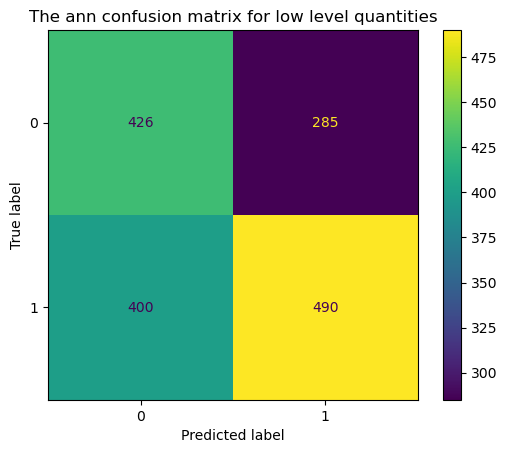

In [48]:
knn_low_disp = ConfusionMatrixDisplay(confusion_matrix=knn_low_cm)
knn_low_disp.plot()
plt.title("The ann confusion matrix for low level quantities")
plt.show()

### ii) Using high level quantities
#### The data is already scaled so we move on to bulding the ANN for the high level quantities using tensorflow:

In [49]:
ann_high=tf.keras.models.Sequential()

#### We add the input layer and the first hidden layer. It has 7 nodes since there is 7 high level quantities

In [50]:
ann_high.add(Input(shape=(7,)))

#### The 1st hidden layer has 30 nodes

In [51]:
ann_high.add(tf.keras.layers.Dense(30, activation='relu'))

#### The 2nd hidden layer has 21 nodes

In [52]:
ann_high.add(tf.keras.layers.Dense(21, activation='relu'))

#### The output layer has just one node (we use sigmoid as activation because this is a binary classification problem)

In [53]:
ann_high.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### We move into training our ANN. First we must compile our ANN. Since this is a a binary classification problem we chose the 'binary_crossentropy' loss function, the 'binary_accuracy' metric and the 'adam' optimizer.

In [54]:
ann_high.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
ann_high.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 30)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 21)                  │             651 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 913 (3.57 KB)

 Trainable params: 913 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

#### Next we train the ANN we created on the high level quality data set. We use 150 epochs and a batch size of 15.

In [56]:
ann_high.fit(high_level_train_scaled, high_signal_train, batch_size = 15, epochs = 150)

Epoch 1/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5296 - loss: 0.6993
Epoch 2/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6599 - loss: 0.6232
Epoch 3/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6625 - loss: 0.6107
Epoch 4/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6697 - loss: 0.5991
Epoch 5/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6827 - loss: 0.5857
Epoch 6/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6862 - loss: 0.5785
Epoch 7/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6920 - loss: 0.5782
Epoch 8/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6949 - loss: 0.5755
Epoch 9/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6915 - loss: 0.5736
Epoch 10/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6884 - loss: 0.5694
Epoch 11/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7006 - loss: 0.5600
Epoch 12/150
427/427 ━━━━━━━━━━━━━━━━━━━━

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7315 - loss: 0.5244
Epoch 69/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7290 - loss: 0.5161
Epoch 70/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7271 - loss: 0.5237
Epoch 71/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7249 - loss: 0.5242
Epoch 72/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7394 - loss: 0.5202
Epoch 73/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7301 - loss: 0.5222
Epoch 74/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7285 - loss: 0.5225
Epoch 75/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7396 - loss: 0.5127
Epoch 76/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7359 - loss: 0.5206
Epoch 77/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7335 - loss: 0.5230
Epoch 78/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7358 - loss: 0.5101
Epoch 79/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.5061
Epoch 135/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7503 - loss: 0.4966
Epoch 136/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7453 - loss: 0.5019
Epoch 137/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7398 - loss: 0.5064
Epoch 138/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7506 - loss: 0.4959
Epoch 139/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7440 - loss: 0.5110
Epoch 140/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7370 - loss: 0.5103
Epoch 141/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7507 - loss: 0.4941
Epoch 142/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7438 - loss: 0.5071
Epoch 143/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5019
Epoch 144/150
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7430 - loss: 0.5039
Epoch 145/150
427/427 ━━━━━━━━━━━━━

#### Finally we can make predictions using our ANN made for the high level quantities

In [57]:
ann_high_signal_test_pred=ann_high.predict(high_level_test_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
ann_high_signal_test_pred=(ann_high_signal_test_pred>0.5)
ann_high_signal_test_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

#### Finally we present the confusion matrix and the accuracy of the ann model that uses high level quantities

In [59]:
ann_high_cm = confusion_matrix(high_signal_test, ann_high_signal_test_pred)
print(ann_low_cm)
accuracy_score(high_signal_test, ann_high_signal_test_pred)

[[409 302]
 [399 491]]


0.6970643347907558

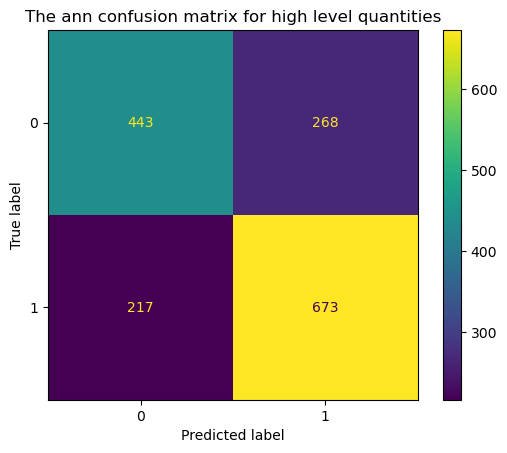

In [60]:
ann_low_disp = ConfusionMatrixDisplay(confusion_matrix=ann_high_cm)
ann_low_disp.plot()
plt.title("The ann confusion matrix for high level quantities")
plt.show()

In [61]:
knn_high_loss, knn_high_accuracy = ann_high.evaluate(high_level_test_scaled, high_signal_test)
print(f'Test loss: {knn_high_loss}')
print(f'Test accuracy: {knn_high_accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6867 - loss: 0.6145
Test loss: 0.6006110906600952
Test accuracy: 0.6970643401145935
